# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('datasets/Canada.xlsx',
                  sheet_name = 'Canada by Citizenship',
                  skiprows = range(20), #filas saltadas del excel
                  skipfooter = 2,
                  engine = 'openpyxl') #lector de excel

In [32]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [33]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage','Unnamed: 43','Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], #columnas eliminadas
       axis = 1, #axis 0 = filas / axis 1 = columnas
       inplace = True) #reemplaza base de datos original
df.rename(columns = {'OdName' : 'Country',
                    'AreaName' : 'Continent',
                    'RegName' : 'Region'}, # renombra datos
         inplace = True)
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0


In [34]:
df['Total'] = df.iloc[:, 4:].sum(axis = 1) #agrega columna
#iloc[columnas, filas] en indices
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


In [35]:
df.columns = list(map(str,
                     df.columns)
                 ) #se hacen string las variables

fav_years = list(map(str,
                    range(1980, 2014),
                    )
                ) #variable de únicamente datos de los años

df.set_index('Country',
            inplace = True) # se selecciona columna como índice
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


In [47]:
haiti = df.loc['Haiti', fav_years] #personas que llegaron de haiti a canada durante los años
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

In [41]:
plt.style.use('ggplot') #estilo de gráfico

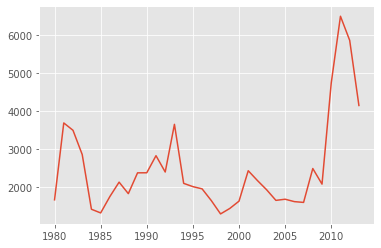

In [42]:
haiti.plot() #gráfico de datos

Text(0.5, 0, 'Years')

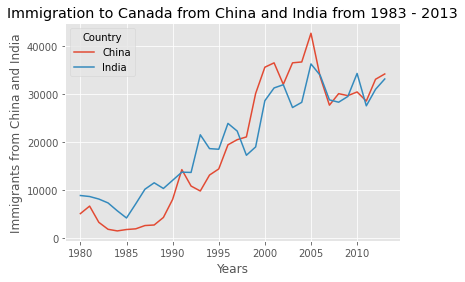

In [53]:
ChinaIndia = df.loc[['China', 'India'], 
                    fav_years] #datos de China e India en los años
ChinaIndia = ChinaIndia.transpose() #se cambian filas por columnas para que quede bien la gráfica

ChinaIndia.plot()
plt.title('Immigration to Canada from China and India from 1983 - 2013') #título de gráfica
plt.ylabel('Immigrants from China and India') #título eje y
plt.xlabel('Years') #título eje x

In [68]:
df_top = df.sort_values(by = 'Total',
                       ascending = False,
                       axis = 0,
                       ) #países con un un número total descendente (de mayor a menor)

df_top.drop(['Total', 'Unknown'],
           axis = 0,
           inplace = True)

df_top = df_top.head(5)

df_top


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


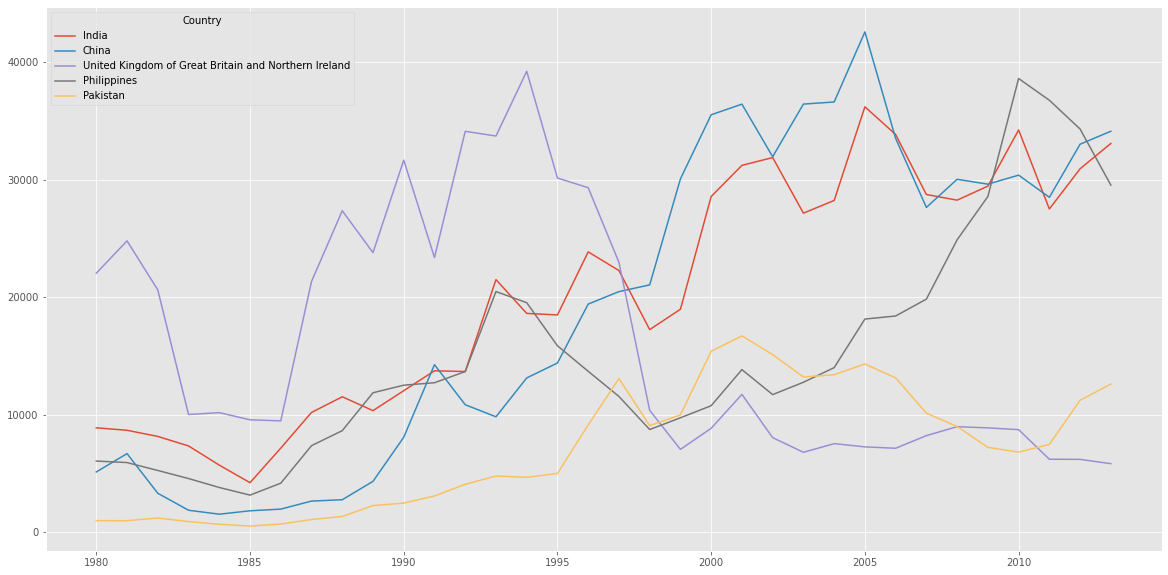

In [70]:
df_top5 = df_top[fav_years]

df_top5 = df_top5.transpose()

df_top5.plot(kind = 'line',
            figsize = (20,10) #tamaño
            )


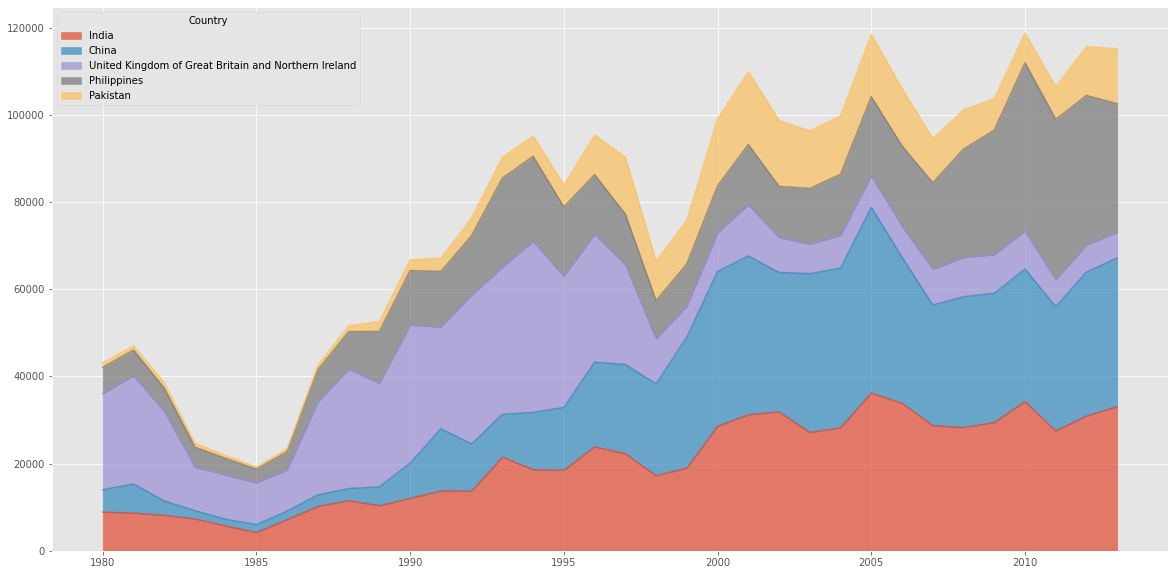

In [74]:
area_chart = df_top5.plot(kind = 'area',
                         alpha = 0.7, #opacidad de gráfica
                         figsize = (20, 10))
area_chart

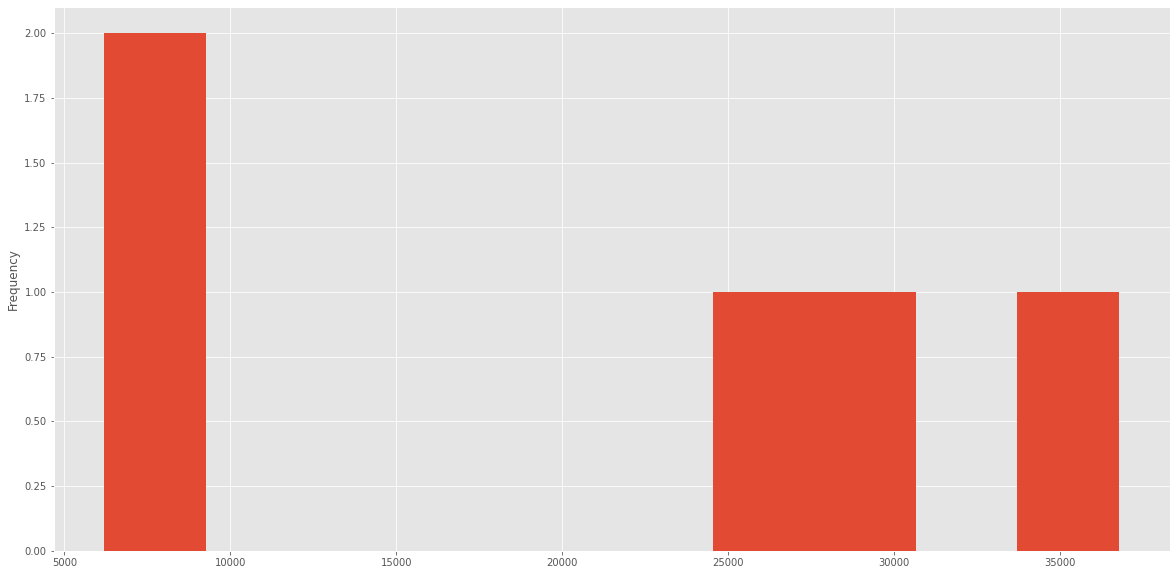

In [90]:
df_top5 = df_top5.transpose()

df_top5['2011'].head()

#count, bin_edges = np.histogram(df_top5.loc['2011'])
df_top5['2011'].plot(kind = 'hist',
                     figsize = (20, 10))

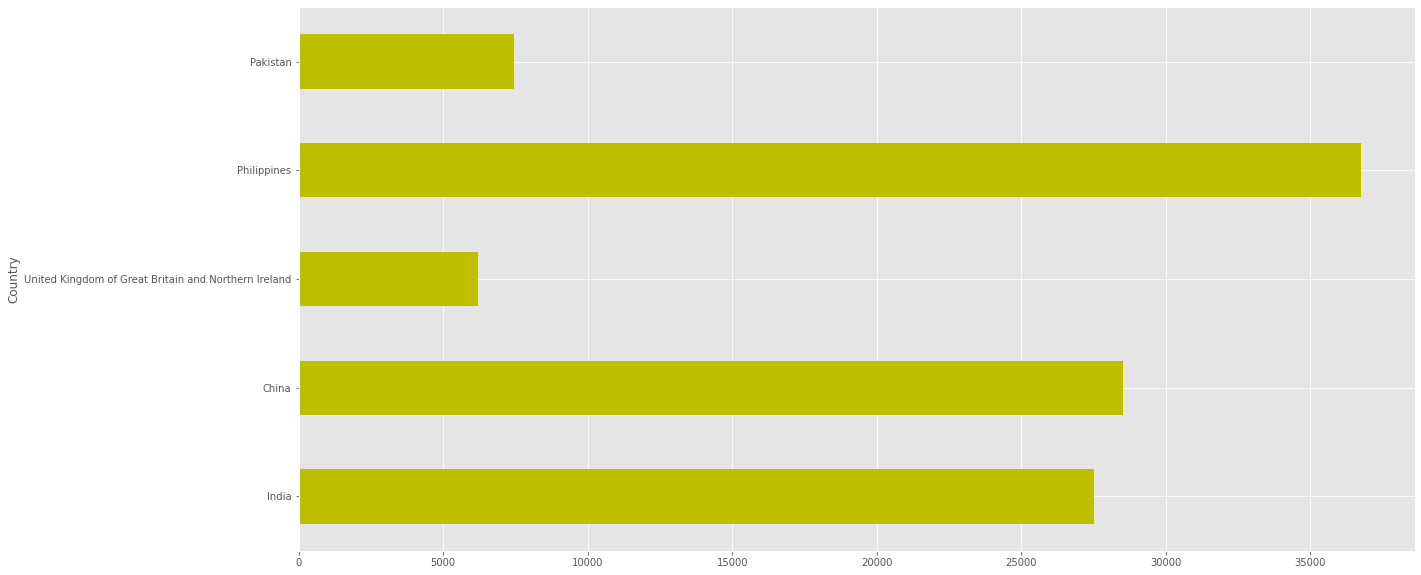

In [94]:
df_top5['2011'].plot(kind = 'barh',
             figsize = (20,10),
             color = 'y',
             alpha = 1
            )
